fractbyrand


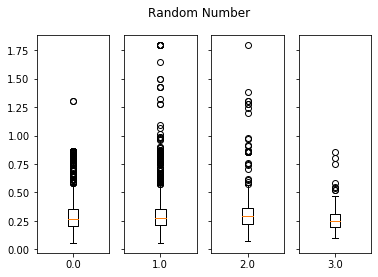

constbyavgnx


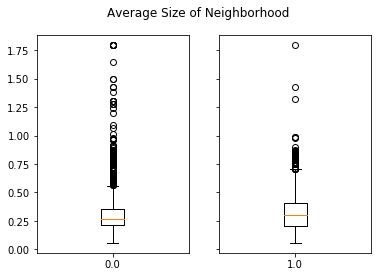

intensitybysizeofix


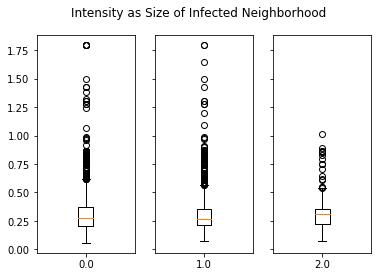

calcproductoverinfected


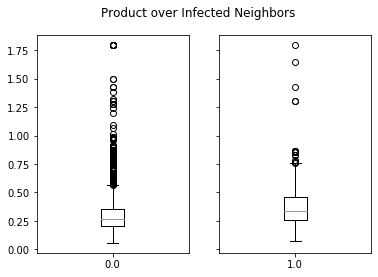

constbynx


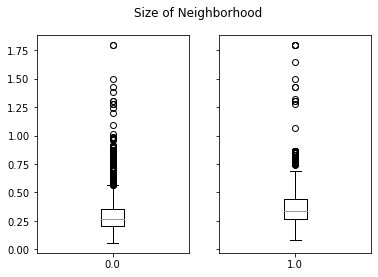

constbymaxnx


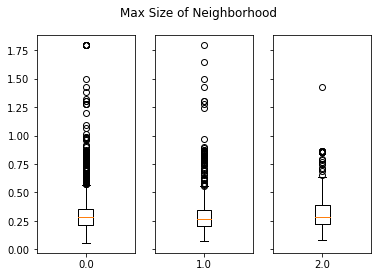

intensityasfractinfectednbrs


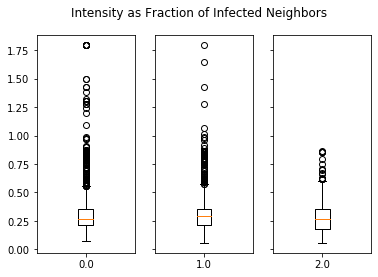

intensityasconstantprobabilityoverinfected


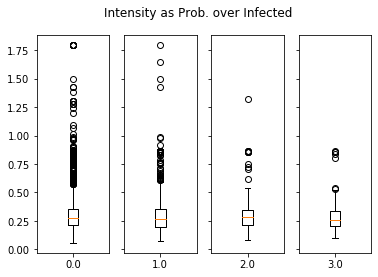

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

factorscores_file = '/home/social-sim/RESEARCH/DOI_Inverse/doiemd/FactorScores.csv'

df = pd.read_csv(factorscores_file)
other_columns = {'Run', 'Gen', 'Rule', 'Fitness'}
factor_columns_list = set(list(df.columns)).difference(other_columns)

title_dict = {'intensityasconstantprobabilityoverinfected' : 'Intensity as Prob. over Infected',
'constbyavgnx' : 'Average Size of Neighborhood',
'intensitybysizeofix' : 'Intensity as Size of Infected Neighborhood',
'intensityasfractinfectednbrs' : 'Intensity as Fraction of Infected Neighbors',
'calcproductoverinfected' : 'Product over Infected Neighbors',
'constbymaxnx': 'Max Size of Neighborhood',
'fractbyrand':'Random Number',
'constbynx':'Size of Neighborhood'
}

for factor_column in factor_columns_list:
    print(factor_column)
    t = 0
    def plotBox(axarray, x):
        global t
        if x.shape[0] > 100:
            t += 1
            axarray[t-1].boxplot(x, positions=[x.name])

    # number of values with more than 100 samples
    num_of_values = df[factor_column].value_counts()[df[factor_column].value_counts() > 100].shape[0]

    fig , axes = plt.subplots(1, num_of_values, sharey=True)
    plt.suptitle(f"{title_dict[factor_column]}")
    df.groupby(factor_column)['Fitness'].apply( lambda x: plotBox(axes,x) )
    plt.savefig(f"{factor_column}.png")
    plt.show()



3       0.857842
5       0.441618
6       0.868459
13      0.748808
16      0.868459
          ...   
4562    0.273950
4729    0.590443
5009    0.276842
5054    0.185137
5087    0.190076
Name: Fitness, Length: 269, dtype: float64

In [12]:
from scipy.stats import mannwhitneyu
import numpy as np

In [31]:
pvalmatrix = np.empty((len(factor_columns_list),len(factor_columns_list)))
horIdx = 0
for factor_column_hori in factor_columns_list:
    horIdx += 1
    vertIdx = 0
    for factor_column_vert in factor_columns_list:
        u, p = mannwhitneyu(df[df[factor_column_hori] > 0.0]['Fitness'].values, df[df[factor_column_vert] > 0.0]['Fitness'].values)
        print(f"{factor_column_hori} vs {factor_column_vert} -> u: {u}, p: {p}")
        pvalmatrix[horIdx][vertIdx] = p
        vertIdx += 1

fractbyrand vs fractbyrand -> u: 4467060.5, p: 0.4999970101406787
fractbyrand vs constbyavgnx -> u: 1021907.0, p: 7.298317952346211e-05
fractbyrand vs intensitybysizeofix -> u: 4666529.0, p: 0.12598369818064975
fractbyrand vs calcproductoverinfected -> u: 292145.0, p: 5.196248316386104e-14
fractbyrand vs constbynx -> u: 583481.5, p: 5.7262103935007944e-24
fractbyrand vs constbymaxnx -> u: 3145737.0, p: 0.0030037108246729395
fractbyrand vs intensityasfractinfectednbrs -> u: 3333679.5, p: 0.07645988282533951
fractbyrand vs intensityasconstantprobabilityoverinfected -> u: 1992822.5, p: 0.16922270611792017
constbyavgnx vs fractbyrand -> u: 1021907.0, p: 7.298317952346211e-05
constbyavgnx vs constbyavgnx -> u: 282000.5, p: 0.49997626316676824
constbyavgnx vs intensitybysizeofix -> u: 1064291.0, p: 2.19424054021281e-06
constbyavgnx vs calcproductoverinfected -> u: 86735.0, p: 0.00028731507466047714
constbyavgnx vs constbynx -> u: 171404.5, p: 2.7627249229800927e-06
constbyavgnx vs constbymax

IndexError: index 8 is out of bounds for axis 0 with size 8

In [32]:
pvalmatrix

array([[1.00000000e-01, 1.00000000e-01,            nan, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01],
       [4.99997010e-01, 7.29831795e-05, 1.25983698e-01, 5.19624832e-14,
        5.72621039e-24, 3.00371082e-03, 7.64598828e-02, 1.69222706e-01],
       [7.29831795e-05, 4.99976263e-01, 2.19424054e-06, 2.87315075e-04,
        2.76272492e-06, 1.33815810e-07, 1.72080896e-03, 4.40566527e-05],
       [1.25983698e-01, 2.19424054e-06, 4.99997270e-01, 1.46484205e-16,
        3.72287612e-28, 3.21839110e-02, 4.70680247e-03, 4.62845154e-01],
       [5.19624832e-14, 2.87315075e-04, 1.46484205e-16, 4.99889346e-01,
        3.87920282e-01, 8.36562811e-18, 4.44003450e-11, 5.33361812e-14],
       [5.72621039e-24, 2.76272492e-06, 3.72287612e-28, 3.87920282e-01,
        4.99960637e-01, 8.77087979e-30, 1.95442937e-18, 2.43752148e-22],
       [3.00371082e-03, 1.33815810e-07, 3.21839110e-02, 8.36562811e-18,
        8.77087979e-30, 4.99995274e-01, 6.78583318e-05, 9.

([<matplotlib.axis.YTick at 0x7f7d2bca9e80>,
 <a list of 8 Text yticklabel objects>)

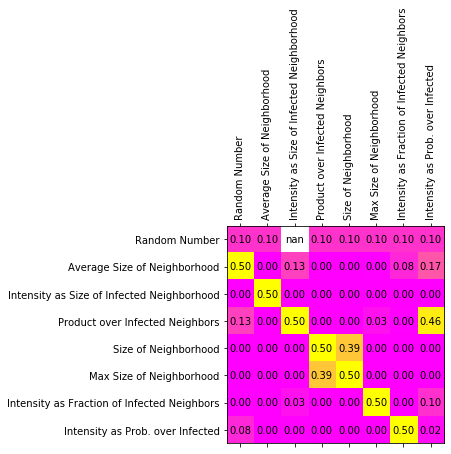

In [43]:
fig, ax = plt.subplots()
ax.matshow(pvalmatrix, cmap=plt.cm.spring)
for i in range(pvalmatrix.shape[0]):
    for j in range(pvalmatrix.shape[1]):
        c = pvalmatrix[j, i]
        ax.text(i,j, "{:.2f}".format(c), va='center', ha='center')
plt.xticks(range(len(factor_columns_list)), [title_dict[f] for f in factor_columns_list], rotation=90)
plt.yticks(range(len(factor_columns_list)), [title_dict[f] for f in factor_columns_list])